In [1]:
%pylab inline
import requests, zipfile
import StringIO
import datetime
import pandas as pd
import numpy as np
from workflow.data import *
import pdb
import seaborn as sns
from matplotlib import pyplot

Populating the interactive namespace from numpy and matplotlib


Most of the routines tested here are found in the `workflow/data.py` or `workflow/features.py` scripts. Please refer to those files for better context into how they work.

In [2]:
# find csv file for tripdata
year = 2015
month = 3
#csvPath = '{}{:02}-citibike-tripdata.csv'.format(year, month)
#df = pd.read_csv(basepath + csvPath, parse_dates = ['Start Time', 'Stop Time'])
df = trip_data(year, month)
#df['trip_id'] = df.index.values
df.head()

,duration,start_time,stop_time,start_id,start_name,start_lat,start_long,stop_id,stop_name,stop_lat,stop_long,bike_id,user_type,birth_year,gender
0,669,2015-03-01 00:00:00,2015-03-01 00:11:00,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1
1,750,2015-03-01 00:01:00,2015-03-01 00:14:00,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1
2,663,2015-03-01 00:01:00,2015-03-01 00:12:00,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0
3,480,2015-03-01 00:02:00,2015-03-01 00:10:00,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1
4,1258,2015-03-01 00:02:00,2015-03-01 00:23:00,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1


In [3]:
rebals = rebal_data(year,month)
rebals.head()

,duration,start_time,stop_time,start_id,start_name,start_lat,start_long,stop_id,stop_name,stop_lat,stop_long,bike_id,user_type,birth_year,gender,trip_id
0,345,2015-03-17 15:42:00,2015-03-16 22:35:00,402,Broadway & E 22 St,40.740343,-73.989551,487.0,E 20 St & FDR Drive,40.733143,-73.975739,14529,Subscriber,1979.0,1,161757
1,820,2015-03-19 21:31:00,2015-03-19 20:12:00,523,W 38 St & 8 Ave,40.754666,-73.991382,480.0,W 53 St & 10 Ave,40.766697,-73.990617,14529,Subscriber,1982.0,1,197300
2,520,2015-03-30 20:05:00,2015-03-30 18:20:00,491,E 24 St & Park Ave S,40.740964,-73.986022,229.0,Great Jones St,40.727434,-73.993790,14529,Subscriber,1957.0,1,325665
3,624,2015-03-31 07:57:00,2015-03-30 21:05:00,501,FDR Drive & E 35 St,40.744219,-73.971212,487.0,E 20 St & FDR Drive,40.733143,-73.975739,14529,Subscriber,1960.0,1,329600
4,1464,2015-03-07 18:02:00,2015-03-07 02:12:00,410,Suffolk St & Stanton St,40.720664,-73.985180,438.0,St Marks Pl & 1 Ave,40.727791,-73.985649,14530,Subscriber,1966.0,1,35360


## Interesting stats

In [4]:
print "Total trips for {}-{:02}: {}".format(year, month, df.shape[0])

Total trips for 2015-03: 341826


In [5]:
sub_trips = df[df.user_type == 'Subscriber'].shape[0] / float(df.shape[0])
print "% subscribers: {:.3f}".format(100*sub_trips)

% subscribers: 96.240


In [6]:
male_trips = df[df.gender == 1].shape[0] / float(df.shape[0])
female_trips = df[df.gender == 2].shape[0] / float(df.shape[0])# add a column called trip_id within
print "% Male trips: {:.3f}".format(100*male_trips)
print "% Female trips: {:.3f}".format(100*female_trips)
print "% other trips: {:.3f}".format(100*(1 - male_trips - female_trips))

% Male trips: 77.773
% Female trips: 18.443
% other trips: 3.784


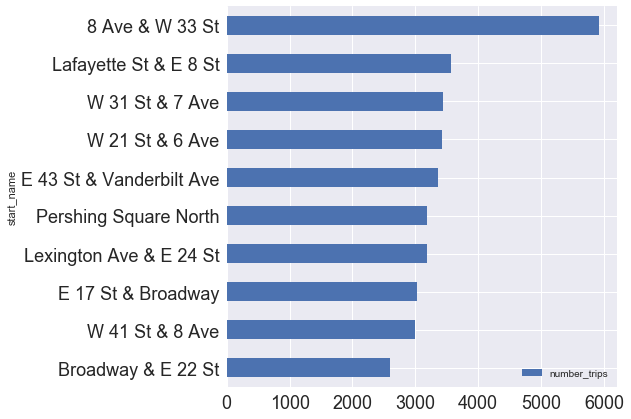

In [8]:
# top 10 starting locations
top_starts = df.groupby(['start_name', 'start_lat', 'start_long', 'start_id']).count().duration.sort_values(ascending = False)
top_starts = top_starts.reset_index()
top_starts['number_trips'] = top_starts.duration
top_starts

top_starts.sort_values('number_trips').tail(10).plot(kind = 'barh', 
                         x = 'start_name', y = 'number_trips',figsize=(7,7))
plt.tick_params(labelsize=18)

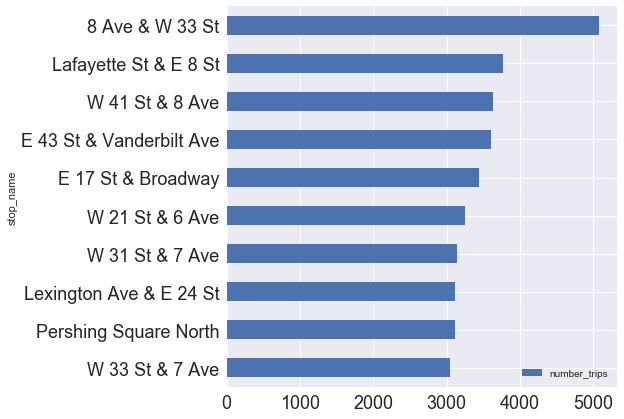

In [9]:
# top 10 stopping locations
top_stops = df.groupby(['stop_name', 'stop_lat', 'stop_long', 'stop_id']).count().duration.sort_values(ascending = False)
top_stops = top_stops.reset_index()
top_stops['number_trips'] = top_stops.duration
top_stops

top_stops.sort_values('number_trips').tail(10).plot(kind = 'barh', 
                         x = 'stop_name', y = 'number_trips', figsize=(7,7))
plt.tick_params(labelsize=18)

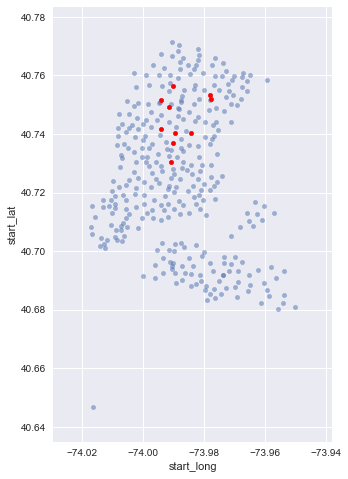

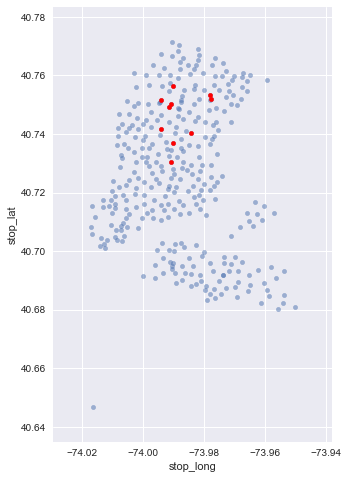

In [10]:
def plot_top_stations(df, x_values, y_values):
    pl = df.plot(kind = 'scatter', x = x_values, y = y_values, 
                alpha = 0.5, figsize = (5,8))
    df.head(10).reset_index().plot(kind = 'scatter', x = x_values,
                 color = 'r', y = y_values, ax = pl)

plot_top_stations(top_starts, 'start_long', 'start_lat')
plot_top_stations(top_stops, 'stop_long', 'stop_lat')

## Rebalancing

In [ ]:
oneday = df[(df.start_time.dt.day == 1) & (df.start_time.dt.month == 3)]

In [ ]:
bike_list = df.bike_id.unique()

# collect rebal events for the first 100 bikes
df = df.sort_values(['bike_id', 'start_time'])
#cols = ['start_id','stop_id', 'start_time', 'stop_time', 'bike_id']
df1 = df[df.bike_id.isin(bike_list[:100])]

# track rebalancing events 
#(REMEMBER THAT REBAL EVENTS USE STOP_TIME AS THE STARTING TIME)

shift_cols = ['stop_id','stop_time', 'stop_long', 'stop_lat', 'stop_name']

def shift_cond(bike_df):
    bike_df[shift_cols] = bike_df[shift_cols].shift(1)
    return bike_df[bike_df.start_id != bike_df.stop_id]

In [ ]:
rebal_times = ((rebal_df.start_time - rebal_df.stop_time) / 2) + rebal_df.stop_time
rebal_spreads = (rebal_df.start_time - rebal_df.stop_time) / 2

## Calculate fluxes

In [ ]:
#oneday = df[(df.start_time.dt.day == 1) & (df.start_time.dt.month) == 1]

In [ ]:
df['start_hour'] = df.start_time.dt.hour
df['stop_hour'] = df.stop_time.dt.hour
#df[['start_hour', 'stop_hour']] = df[['start_time', 'stop_time']].apply(lambda x: x.dt.hour)
df[['start_date', 'stop_date']] = df[['start_time', 'stop_time']].apply(lambda x: x.dt.floor('d'))
df.tail()

In [ ]:
def split_off_times(df):
    df['start_hour'] = df.start_time.dt.hour
    df['stop_hour'] = df.stop_time.dt.hour
    df[['start_date', 'stop_date']] = df[['start_time', 'stop_time']].apply(lambda x: x.dt.floor('d'))
    return df

def create_fluxes(df, id_key, date_key, hour_key, fl_key):
    # id_key and hour_key are start_id/stop_id and start_date/end_date
    # start is associated with an fl_key = 'flux_out',
    # and stop is associated with fl_key = 'flux_in'
    use_cols = [id_key, date_key, hour_key, 'duration']

    flux = df.groupby([id_key, date_key, hour_key]).count()
    flux = flux.reset_index()[use_cols]
    col_dict = {'duration': fl_key,
                date_key: 'date', hour_key: 'hour',
                id_key: 'id'}
    return flux.rename(columns = col_dict)

def transform_times(df):
    # calculate approximate pickup and drop-off times for rebalancing trips
    t_start = df.start_time
    t_end = df.stop_time
    time_diff = t_start - t_end

    r_start = t_end + time_diff/3.
    r_end = t_end + time_diff*(2/3.)

    df['start_time'] = r_start
    df['stop_time'] = r_end
    return df.rename(columns = {'start_id':'stop_id', 'stop_id':'start_id'})


def merge_fluxes(df1, df2):
    # concatenate fluxes or any other dataset with the keys
    # 'id' 'date' and 'hour
    return pd.merge(df1, df2, how='outer',
                              on = ['id', 'date', 'hour']).fillna(0)

In [ ]:
# create fluxes from normal trips and merge
bikes_out = create_fluxes(df, 'start_id', 'start_date','start_hour', 'bikes_out')
bikes_in = create_fluxes(df, 'stop_id', 'stop_date','stop_hour', 'bikes_in')

merged = merge_fluxes(bikes_out, bikes_in)

In [ ]:
import holidays
us_holidays = holidays.UnitedStates()

merged['dayofweek'] = merged.date.dt.weekday
merged['month'] = merged.date.dt.month
merged['year'] = merged.date.dt.year
merged['is_weekday'] = merged.dayofweek.isin(range(5))
merged['is_holiday'] = merged.date.isin(holidays.UnitedStates())

In [ ]:
merged.head()

In [ ]:
# merge rebal fluxes
rebals = transform_times(rebals)
rebals = split_off_times(rebals)
#create fluxes from rebalanced trips
rflux_out = create_fluxes(rebals, 'start_id', 'start_date', 'start_hour', 'rbikes_out')
rflux_in = create_fluxes(rebals, 'stop_id', 'stop_date', 'stop_hour', 'rbikes_in')

rmerged = merge_fluxes(rflux_out, rflux_in)
rmerged['rebal_net_flux'] = rmerged.rbikes_in - rmerged.rbikes_out
rmerged = rmerged.drop(['rbikes_in', 'rbikes_out'], axis=1)

In [ ]:
rmerged.head()

In [ ]:
merged.head()

In [ ]:
feat = merge_fluxes(merged, rmerged)
feat.head()

In [ ]:
avail_db = station_data(year,month)

In [ ]:
avail_db.head()

In [ ]:
feat.head()

In [ ]:
'''
def create_fluxes(df, id_key, time_key, fl_key):
    # id_key and time_key are start_id/stop_id and start_time/end_time
    # for normal trips, start is associated with an fl_key = 'flux_out',
    # and stop is associated with fl_key = 'flux_in'

    flux = df[[id_key, time_key]].groupby([df[time_key].dt.to_period('H'), id_key]).count()
    flux = flux[time_key].fillna(0).unstack(level=0).stack()
    flux = flux.reset_index().set_index(time_key)
    flux.index.name = 'date'
    return flux.rename(columns = {0:fl_key, id_key:'id'}).reset_index()

def merge_fluxes(flux_out, flux_in):
    return pd.merge(flux_out, flux_in, how='outer',
                    on = ['date', 'id']).fillna(0)
'''

In [ ]:
'''
# create fluxes from normal trips
flux_out = create_fluxes(trips, 'start_id', 'start_time', 'flux_out')
flux_in = create_fluxes(trips, 'stop_id', 'stop_time', 'flux_in')

merged = merge_fluxes(flux_out, flux_in)

# create weekday column with values 1 if weekday and 0 if weekend
wkd_cond = lambda x: 1 if True else 0
merged['weekday'] = merged.date.dt.weekday.isin(range(5)).apply(wkd_cond)
merged['hour'] = merged.date.dt.hour
'''

In [ ]:
ages = year - trips.birth_year 
trips['ages'] = ages
trips.groupby([trips.start_time.dt.to_period('H'), ages]).mean()

In [ ]:
def transform_times(df):
    # calculate approximate pickup and drop-off times for rebalancing trips
    t_start = df.start_time
    t_end = df.stop_time
    time_diff = t_start - t_end

    r_start = t_end + time_diff/3.
    r_end = t_end + time_diff*(2/3.)
    
    df['start_time'] = r_start
    df['stop_time'] = r_end
    return df.rename(columns = {'start_id':'stop_id', 'stop_id':'start_id'})

def split_off_times(df):
    df['start_hour'] = df.start_time.dt.hour
    df['stop_hour'] = df.stop_time.dt.hour
    df[['start_date', 'stop_date']] = df[['start_time', 'stop_time']].apply(lambda x: x.dt.floor('d'))
    return df

rebal_df = transform_times(rebal_df)
rebal_df = split_off_times(rebal_df)